<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!👋</b>

Меня зовут Огурлиев Анзор, я буду ревьюером твоего проекта. Сразу хочу предложить тебе общаться на "ты", если тебе это неудобно, скажи мне об этом. Нам предстоит пройти с тобой через тернистый и от того интересный путь анализа данных! Можешь не переживать, я всегда помогу тебе, если у тебя возникнут вопросы)

По ходу твоей работы я буду оставлять свои комментарии, по выполненным тобой шагам. Попрошу тебя не удалять их, так мне будет проще отслеживать твой прогресс в случае повторной проверки.

Очень важно вести диалог и обсуждать те пункты, которые у тебя могли не получиться, поэтому, ты можешь оставлять свои комментарии, и мы обязательно во всем разберемся! Самое главное - выделяй свои комментарии удобным для тебя способом (цвет, рамка), но так, чтобы они отчетлитво отличались от моих комментариев. Так мы ни в чем не запутаемся)

Свои комментарии я буду выделять так: <font color='green'>зеленый</font>, <font color='gold'>желтый</font> и <font color='red'>красный</font> цвет, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Этот комментарий я буду оставлять, если твое решение оптимально для данного шага.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Это не означает, что ты совершил ошибку. Такими комментариями я буду отмечать места, где ты справился с задачей, но её можно решить ещё лучше. Также в таких комментариях я буду оставлять для тебя другие советы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Если решение, которое ты применил на определенном шаге, требует значительных изменений, то я буду оставлять такой комментарий. Тебе нужно будет подумать еще раз как правильным образом решить данный этап. Если ревью содержит такие комментарии, то я не смогу принять проект с первого раза.
</div>

P.S. В оглавлении комментария ты увидишь `V1` (`V1`, `V2`, `V3`) - это версия моего комментария, которая понадобится нам с тобой, чтобы не запутаться, если потребуется оставить тебе комментарии после первой проверки.

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что начинаешь проект с описания.

### Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые библиотеки

In [455]:
import pandas as pd
import matplotlib.pyplot as plt

Прочитаем файл, посмотрим на первые 10 строк

In [456]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
    
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<p><strong>Описание данных<code class="code-inline code-inline_theme_light"></code></strong></p>
<ul>
<li><code class="code-inline code-inline_theme_light">airports_nearest</code> &mdash; расстояние до ближайшего аэропорта в метрах (м)</li>
<li><code class="code-inline code-inline_theme_light">balcony</code> &mdash; число балконов</li>
<li><code class="code-inline code-inline_theme_light">ceiling_height</code> &mdash; высота потолков (м)</li>
<li><code class="code-inline code-inline_theme_light">cityCenters_nearest</code> &mdash; расстояние до центра города (м)</li>
<li><code class="code-inline code-inline_theme_light">days_exposition</code> &mdash; сколько дней было размещено объявление (от публикации до снятия)</li>
<li><code class="code-inline code-inline_theme_light">first_day_exposition</code> &mdash; дата публикации</li>
<li><code class="code-inline code-inline_theme_light">floor</code> &mdash; этаж</li>
<li><code class="code-inline code-inline_theme_light">floors_total</code> &mdash; всего этажей в доме</li>
<li><code class="code-inline code-inline_theme_light">is_apartment</code> &mdash; апартаменты (булев тип)</li>
<li><code class="code-inline code-inline_theme_light">kitchen_area</code> &mdash; площадь кухни в квадратных метрах (м&sup2;)</li>
<li><code class="code-inline code-inline_theme_light">last_price</code> &mdash; цена на момент снятия с публикации</li>
<li><code class="code-inline code-inline_theme_light">living_area</code> &mdash; жилая площадь в квадратных метрах (м&sup2;)</li>
<li><code class="code-inline code-inline_theme_light">locality_name</code> &mdash; название населённого пункта</li>
<li><code class="code-inline code-inline_theme_light">open_plan</code> &mdash; свободная планировка (булев тип)</li>
<li><code class="code-inline code-inline_theme_light">parks_around3000</code> &mdash; число парков в радиусе 3 км</li>
<li><code class="code-inline code-inline_theme_light">parks_nearest</code> &mdash; расстояние до ближайшего парка (м)</li>
<li><code class="code-inline code-inline_theme_light">ponds_around3000</code> &mdash; число водоёмов в радиусе 3 км</li>
<li><code class="code-inline code-inline_theme_light">ponds_nearest</code> &mdash; расстояние до ближайшего водоёма (м)</li>
<li><code class="code-inline code-inline_theme_light">rooms</code> &mdash; число комнат</li>
<li><code class="code-inline code-inline_theme_light">studio</code> &mdash; квартира-студия (булев тип)</li>
<li><code class="code-inline code-inline_theme_light">total_area</code> &mdash; общая площадь квартиры в квадратных метрах (м&sup2;)</li>
<li><code class="code-inline code-inline_theme_light">total_images</code> &mdash; число фотографий квартиры в объявлении</li>
</ul>

Изучим общую информацию




In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<li>Имеются пропущенные значения</li>
<li>Столбец <code class="code-inline code-inline_theme_light">first_day_exposition</code> &mdash; неверно указан тип, должна быть дата</li>
<li>Название столбца <code class="code-inline code-inline_theme_light">cityCenters_nearest</code> &mdash; стоит изменить на city_сenters_nearest</li>
<li>Название столбца <code class="code-inline code-inline_theme_light">parks_around3000</code> &mdash; стоит изменить на parks_around_3000</li>
<li>Название столбца <code class="code-inline code-inline_theme_light">ponds_around3000</code> &mdash; стоит изменить на ponds_around_3000</li>

Построим общую гистограмму для всех числовых столбцов таблицы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

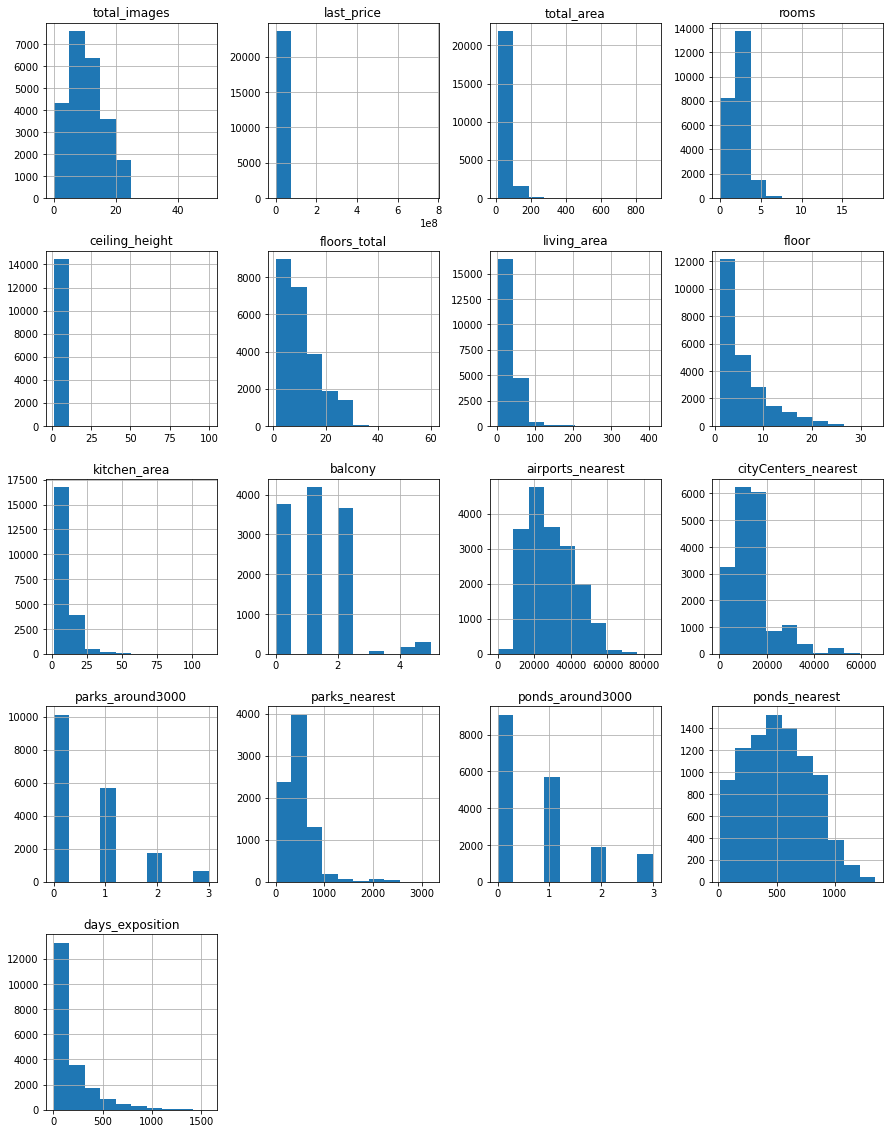

In [458]:
df.hist(figsize=(15, 20))

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно рассмотрел.

### Предобработка данных

#### Замена названий столбцов и типа данных

Изменим тип столбца на datetime

In [459]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

Изменим названия столбцов

In [460]:
df = df.rename(columns={
    'cityCenters_nearest': 'city_сenters_nearest', 
    'parks_around3000': 'parks_around_3000', 
    'ponds_around3000': 'ponds_around_3000'
})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Поиск пропущенных значений

In [461]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<ul>
<li>
<p><code>ceiling_height</code>&nbsp; 9195 - в 38% объявлений пропущена высота потолков, заменим ее на медианное значение, основываясь на количестве этажей в здании</p>
</li>
<li>
<p><code>floors_total</code> 86 - данные не заполнили, удалим пропуски?</p>
</li>
<li>
<p>&nbsp;<code>living_area</code> 1903 - заменим медианой по количеству комнат </p>
</li>
<li>
<p><code>is_apartment</code> 2775 - заменим пропуски на False</p>
</li>
<li>
<p><code>kitchen_area</code> 2278 -возможно это апартаменты, свободная планировка или студия, можно сравнить общую площадь с жилой</p>
</li>
<li>
<p><code>balcony</code> 11519- скорее всего балкона нет - заменим на 0</p>
</li>
<li>
<p><code>locality_name</code> 49 - данные не заполнили, удалим пропуски</p>
</li>
<li>
<p><code>airports_nearest</code> 5542 - возможно, аэропортов рядом нет, оставим пропуски?</p>
</li>
<li>
<p><code>city_centers_nearest</code> 5519 - возможно, центр города не близко, оставим пропуски?</p>
</li>
<li>
<p><code>parks_around3000</code> 5518 - скорее всего в радиусе 3 км парков нет, оставим пропуски</p>
</li>
<li>
<p><code>parks_nearest</code> 15620 - возможно, парков нет, оставим пропуски?</p>
</li>
<li>
<p><code>ponds_around3000</code> 5518 - зкорее всего в радиусе 3 км прудов нет, оставим пропуски</p>
</li>
<li>
<p><code>ponds_nearest</code> 14589 - возможно, прудов нет, оставим пропуски?</p>
</li>
<li>
<p><code>days_exposition</code>&nbsp; 3181 - возможно, объявление не было опубликовано или опубликовано только сегодня, оставим пропуски</p>
</li>
</ul>

По остальным признакам невозможно определить количество этажей в здании, поэтому удалим пропуски.


In [462]:
df = df.dropna(subset=['floors_total'])
df['floors_total'].isna().sum()

0

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Верное решение.

Изменим тип данных на цельночисленный для оптимизации дальнейших расчетов

In [463]:
df['floors_total'] = df['floors_total'].astype('int')

Заменим пропущенные значения для высоты потолков на медианное значение высоты потолков зданий с одинаковой этажностью

In [464]:
for i in df['floors_total'].unique():
    df.loc[(df['floors_total']== i) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
    df.loc[(df['floors_total']== i), 'ceiling_height'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [465]:
df['ceiling_height'].isna().sum()

1

In [466]:
df[df['ceiling_height'].isna()==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28,3,NaN,33,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


Осталась одна строка - удалим ее

In [467]:
df = df.dropna(subset=['ceiling_height'])
df['ceiling_height'].isna().sum()

0

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно, можно заполнить пропуски медианой таким образом.

Пропуски в `living_area` заменим на медианное значение коэффициента отношения общей площади к жилой для каждого населенного пункта

In [468]:
living_area_perc = df.loc[~df['living_area'].isna(), 'living_area'] / df.loc[~df['living_area'].isna(), 'total_area']
living_area_perc

0        0.472222
1        0.460396
2        0.612500
4        0.320000
5        0.473684
           ...   
23693    0.641026
23694    0.547792
23695    0.644068
23696    0.523810
23698    0.380805
Length: 21742, dtype: float64

In [469]:
for i in df['locality_name'].unique():
    df.loc[(df['locality_name']== i) & (df['living_area'].isna()), 'living_area'] = \
    (df.loc[(df['locality_name']== i) & (df['living_area'].isna()), 'total_area']*living_area_perc.median()).round(2)

In [470]:
df['living_area'].isna().sum()

5

Осталось 5 незаполненых значений, заполним их медианным значением по количеству комнат

In [471]:
for i in df['rooms'].unique():
    df.loc[(df['rooms']== i) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms']== i), 'living_area'].median()

In [472]:
len(df[df['living_area']>df['total_area']])

0

In [473]:
df.shape

(23612, 22)

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Можно заполнить пропуски в жилой площади таким образом. Можно было бы еще попробовать заполнить пропуски, основываясь на общей площади, например, с помощью регресии или рассчитать коэффициент отношения жилой площади к общей и взять медианное значение для каждого населенного пункта.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Хоть таких значений всего 29, но такой способ обработки не логичен и не корректен - не учитывается площадь кухни как минимум.

<div class="alert alert-info">
<h2>Комментарий студента V1<a class="tocSkip"></h2>
<div>Исправила пропущенные значения по вашей рекомендации, оставшиеся 5 заполнила также, как в прошлый раз. Теперь, вроде, все красиво, спасибо.</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Супер!

Столбец `is_apartment` заменим пропуски на False, так как скорее всего если это апартаменты, ставилась галочка.

In [474]:
df['is_apartment'] = df['is_apartment'].fillna('False')
df['is_apartment'].isna().sum()

0

Изменим тип данных на булев

In [475]:
df['is_apartment'] = df['is_apartment'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23612 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23612 non-null  int64         
 1   last_price            23612 non-null  float64       
 2   total_area            23612 non-null  float64       
 3   first_day_exposition  23612 non-null  datetime64[ns]
 4   rooms                 23612 non-null  int64         
 5   ceiling_height        23612 non-null  float64       
 6   floors_total          23612 non-null  int64         
 7   living_area           23612 non-null  float64       
 8   floor                 23612 non-null  int64         
 9   is_apartment          23612 non-null  bool          
 10  studio                23612 non-null  bool          
 11  open_plan             23612 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

Рассчитаем отношение площади кухни к жилой площади

In [476]:
kitchen_area_perc = df.loc[~df['kitchen_area'].isna(), 'kitchen_area'] / df.loc[~df['kitchen_area'].isna(), 'living_area']
kitchen_area_perc

0        0.490196
1        0.591398
2        0.241983
4        1.281250
5        0.631944
           ...   
23693    0.200000
23694    0.188677
23695    0.223684
23697    0.534281
23698    0.731707
Length: 21381, dtype: float64

Пропуски в `kitchen_area` устраним по аналогии с `living_area` 

In [477]:
print('Количество пропусков до исправления:', df['kitchen_area'].isna().sum())
for i in df['locality_name'].unique():
    df.loc[(df['locality_name']== i) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    (df.loc[(df['locality_name']== i) & (df['kitchen_area'].isna()), 'living_area']*kitchen_area_perc.median()).round(2)
print('Количество пропусков после исправления:', df['kitchen_area'].isna().sum())

Количество пропусков до исправления: 2231
Количество пропусков после исправления: 9


Остальные пропуски в столбце  `kitchen_area` заменим медианой по количеству комнат

In [478]:
for i in df['rooms'].unique():
    df.loc[(df['rooms']== i) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['rooms']== i), 'kitchen_area'].median()
df['kitchen_area'].isna().sum()

0

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Таким образом ты исказишь данные, нельзя просто скопировать значение жилой площади, не учитывается общая площадь квартиры, которая будет меньше, чем сумма жилой площади и площади кухни. Лучше отталкиваться от разницы жилой площади от кухни, например, или использовать другой метод.

<div class="alert alert-info">
<h2>Комментарий студента V1</h2>
<div>Исправлено</div>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработала, так держать!

Пропуски в столбцу `balcony` заменим на 0

In [479]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

Приведем столбец к цельночисленному значению для оптимизации дальнейших вычислений

In [480]:
df['balcony'] = df['balcony'].astype('int')

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно обработала, молодец!

В столбце `locality_name` удалим пропущенные значения, тк восстановить их не представляется возможным

In [481]:
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

Посмотрим на уникальные значения

In [482]:
len(df['locality_name'].unique())


364

In [483]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Приведем значения к нижнему регистру и уберем неявные дубликаты

In [484]:
df['locality_name'] = df['locality_name'].str.lower()
len(df['locality_name'].unique())

364

In [485]:
def replace_wrong_values(wrong_values, correct_value):
    for wrong_value in wrong_values:
        df['locality_name'] = df['locality_name'].str.replace(wrong_value, correct_value)
duplicates = ['посёлок', 'посёлок городского типа', 'коттеджный поселок', 'городской посёлок', 'посёлок при железнодорожной станции', 'посёлок при станции', 'поселок городского типа', 'городской поселок', 'поселок при железнодорожной станции', 'поселок при станции'] # список неправильных названий
name = 'поселок' # правильное название
replace_wrong_values(duplicates, name)
len(df['locality_name'].unique())

321

In [486]:
sorted(df['locality_name'].unique())

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'деревня зимитицы',
 'деревня извара',
 'деревня иссад',
 'деревня калитино',
 'деревня кальтино',
 'деревня камышовка',
 'деревня каськово',
 'деревня келози',
 'деревня кипень',
 'деревня кисельня',
 'деревня колтуши',
 'деревня коркино',
 'деревня котлы',
 'деревня кривко',
 'деревня кудрово',
 'деревня кузьмолово',
 'деревня курковицы',
 'деревня куровицы',
 'деревня куттузи',
 'деревня лаврики',
 'деревня

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Неявные дубликаты обработала правильно. Можно было бы с помощью функции найти название населенного пункта и оставить только его.

Пропущенные данные для столбцов `city_сenters_nearest	parks_around_3000	parks_nearest	ponds_around_3000	ponds_nearest` заполняются автоматически, скорее всего после введения точного адреса. Большая часть незаполненных значений для апартаментов за пределами Санкт-Петербурга. Может, это строящиеся здания, еще не имеющие адреса? Или баг в системе, позволяющий не писать точный адрес для апартаментов. В нашей таблице эти пропуски оставим.

In [487]:
df.query('city_сenters_nearest.isna()==True & airports_nearest.isna()==True & is_apartment == True & locality_name !="санкт-петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,9.10,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,True,...,8.81,0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,2.55,5,30.00,5,True,...,9.00,0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,True,...,11.00,2,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,2.55,9,18.64,2,True,...,5.64,0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5,45.50,3,True,...,5.50,0,поселок дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07,1,2.55,5,17.50,4,True,...,6.00,0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.00,4,True,...,8.50,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.70,1,True,...,8.99,0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим на пропуски в столбце `days_exposition`

In [488]:
df[df['days_exposition'].isna()==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,40.68,22,True,...,18.90,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18,1,2.75,22,22.73,3,True,...,6.88,1,санкт-петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02,2,2.65,9,30.30,7,True,...,7.00,0,санкт-петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31,2,2.60,24,29.70,9,True,...,8.30,2,санкт-петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26,71.40,17,True,...,15.60,0,санкт-петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5,17.30,5,True,...,5.60,1,ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.30,3,True,...,13.83,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.70,1,True,...,8.99,0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [489]:
print(df['days_exposition'].describe())
print()
print('Количество пропусков:', df['days_exposition'].isna().sum())

count    20393.000000
mean       180.747659
std        219.736349
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Количество пропусков: 3171


In [490]:
#Скорее всего - это объявления, снятые с публикации в тот же день, что и размещены, поставим 0
#df['days_exposition'] = df['days_exposition'].fillna(0)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Не факт. Лучше оставить пропуски как есть, если заполнить их нулям, то ты изменишь статистики этой случайной величины в меньшую сторону и нельзя будет корректно увидеть средний срок продажи квартир и тд.

<div class="alert alert-info">
<h2>Комментарий студента V1</h2>
<div>Оставим пропуски как есть&nbsp;</div>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно.

Посмотрим, что у нас получилось

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  float64       
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23564 non-null  int64         
 7   living_area           23564 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  bool          
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          23564 non-null  float64       
 13  balcony         

В итоге предобработки данных:
       
       1. были заменены названия столбцов на более читаемые(приведены к нижнему регистру, добавлено нижнее подчеркивание)
       2. заполнены пропуски в данных на основе коэффициентов и медианных значений других столбцов, либо удалены в случаях невозможности исправления. Пропуски были вызваны техническими ошибками - в автоматически создаваемых столбцах не подтянулись расстояния(либо из за того, что для апартаментов необязательно заполнять адрес, либо для строящихся домов с апартаментами адреса пока нет) и человеческим фактором (некоторые столбцы не были заполнены)
       3. устранены неявные дубликаты в названиях населенных пунктов путем приведения к нижнему регистру и замены по словарю
       4. изменены типы данных там, где это необходимо (приведены к цельночисленным и булевым типам) для оптимизации дальнейших рассчетов
       

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец со стоимостью одного квадратного метра

In [492]:
df['price_per_meter'] = df['last_price'] / df['total_area']

Добавим столбцы с днем, месяцем и годом публикации объявления

In [493]:
df['day_week'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Добавим столбец с типом этажа квартиры: первый, последний, другой

In [494]:
def floor(f):
    if f['floor'] == 1:
        return 'первый'
    elif f['floor'] == f['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor, axis=1)

Добавим столбец с расстоянием до центра города в км и округлим до целых значений

In [495]:
df['city_center_km'] = round(df['city_сenters_nearest'] / 1000, 0)


In [496]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_week,month,year,floor_type,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,True,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.60,1,True,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.30,4,True,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,90.35,9,True,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,True,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Новые столбцы рассчитала абсолютно верно, использовала подходящие методы, так держать!

### Проведите исследовательский анализ данных

#### Изучение отдельных параметров

##### Общая площадь

In [497]:
df['total_area'].describe()

count    23564.000000
mean        60.321098
std         35.656831
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [498]:
df.query('total_area==12 | total_area==900')



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_week,month,year,floor_type,city_center_km
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,True,...,NaN,2.0,318.0,106.0,466666.666667,2,12,2017,последний,8.0
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5,10.0,2,True,...,886.0,2.0,45.0,200.0,200000.000000,2,7,2017,другой,1.0


<AxesSubplot:title={'center':'Total area'}, ylabel='Frequency'>

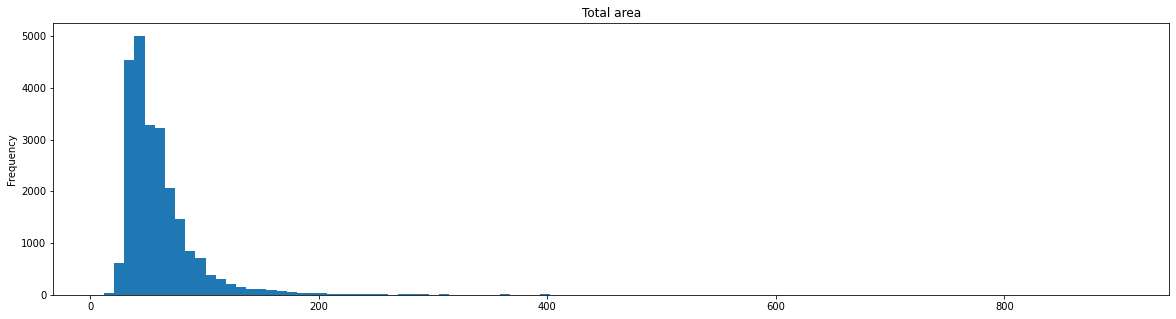

In [499]:
df['total_area'].plot(kind = 'hist', title = 'Total area', bins=100, figsize=(20, 5))

<AxesSubplot:title={'center':'Total area'}>

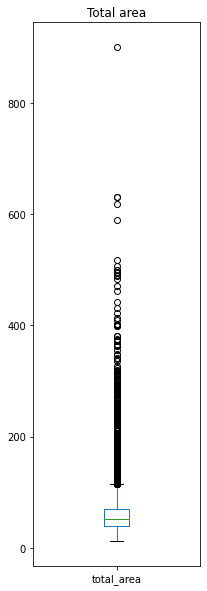

In [500]:
df['total_area'].plot(kind='box', title = 'Total area', figsize=(3, 10))

In [501]:
df['total_area'].quantile(0.99)

197.4589999999993

In [502]:
print('Количество квартир с очень большой площадью:', len(df[df['total_area']>=198]))

Количество квартир с очень большой площадью: 235


Из описания видно, что минимальная площадь продаваемой квартиры - 12 кв.м (апартаменты в центре города). Максимальная площадь - 900 кв.м, тоже апартаменты. Взглянув на графики, видим довольно большие и редко встречающиеся значения площади после ~ 200 кв.м. Для выбросов воспользуемся методом рассчета 99 квантиля и удалим выбросы.

In [503]:
df = df[df['total_area']<198]
df['total_area'].describe()

count    23329.000000
mean        58.094722
std         26.371670
min         12.000000
25%         40.000000
50%         51.700000
75%         68.700000
max        197.900000
Name: total_area, dtype: float64

<AxesSubplot:title={'center':'Total area'}, ylabel='Frequency'>

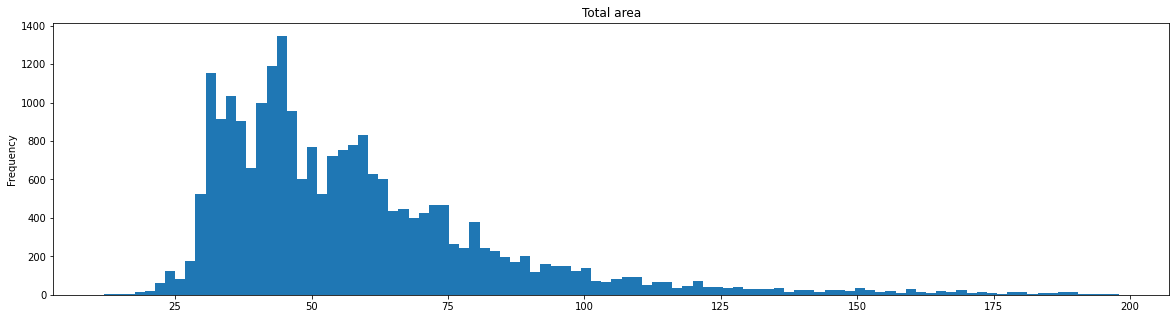

In [504]:
df['total_area'].plot(kind = 'hist', title = 'Total area', bins=100, figsize=(20, 5))

Большая часть продаваемых квартир в районе 30 и 45 кв.м

##### Жилая площадь

In [505]:
df['living_area'].describe()


count    23329.000000
mean        33.253405
std         17.209388
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

<AxesSubplot:title={'center':'Living area'}, ylabel='Frequency'>

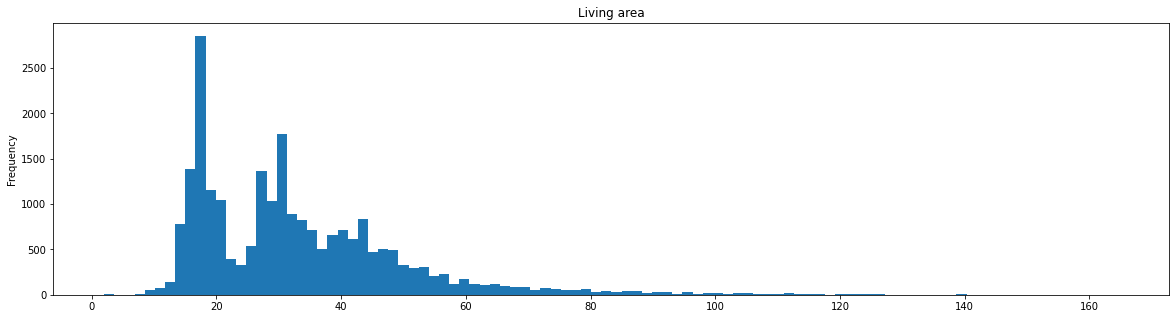

In [506]:
df['living_area'].plot(kind = 'hist', title ='Living area', bins=100, figsize=(20, 5))


<AxesSubplot:title={'center':'Living area'}>

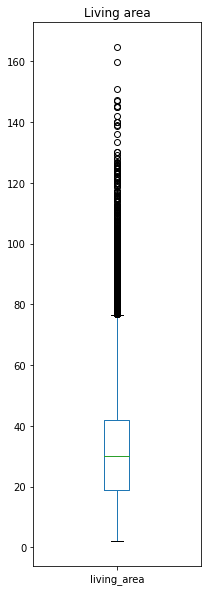

In [507]:
df['living_area'].plot(kind='box', title ='Living area', figsize=(3, 10))


In [508]:
df['living_area'].quantile(.99)


95.4

In [509]:
print('Количество квартир с очень большой жилой площадью:', len(df[df['living_area']>=95]))


Количество квартир с очень большой жилой площадью: 251


In [510]:
df.query('living_area <=2 | living_area >164')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_week,month,year,floor_type,city_center_km
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,True,...,NaN,1.0,1012.0,91.0,122115.384615,1,2,2018,другой,7.0
21676,20,23600000.0,181.3,2017-07-10,4,3.50,7,164.7,7,True,...,484.0,1.0,305.0,NaN,130170.987314,0,7,2017,последний,6.0
21758,0,2330000.0,23.0,2018-01-01,0,2.75,24,2.0,22,True,...,NaN,NaN,NaN,66.0,101304.347826,0,1,2018,другой,NaN


Из описания видно, что минимальная жилая площадь продаваемой квартиры - 2 кв.м (апартаменты). Максимальная жилая площадь - 165 кв.м, тоже апартаменты. Взглянув на графики, видим довольно большие и редко встречающиеся значения площади после ~ 100 кв.м. Для выбросов воспользуемся методом рассчета 99 квантиля и удалим выбросы.

In [511]:
df.shape

(23329, 28)

In [512]:
df = df[df['living_area']<95]
df['living_area'].describe()


count    23078.000000
mean        32.424004
std         15.282165
min          2.000000
25%         18.900000
50%         30.000000
75%         41.400000
max         94.900000
Name: living_area, dtype: float64

In [513]:
df.shape

(23078, 28)

<AxesSubplot:title={'center':'Living area'}, ylabel='Frequency'>

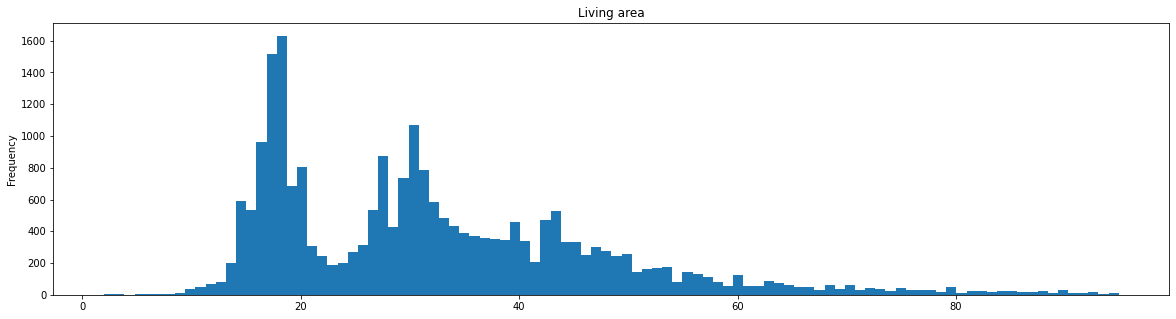

In [514]:
df['living_area'].plot(kind = 'hist', title ='Living area', bins=100, figsize=(20, 5))


Большая часть продаваемых квартир имеет жилую площадь в районе 18 и 30 кв.м


##### Площадь кухни


In [515]:
df['kitchen_area'].describe()


count    23078.000000
mean        10.179406
std          5.184962
min          0.610000
25%          7.000000
50%          9.000000
75%         11.600000
max         93.200000
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'Kitchen area'}, ylabel='Frequency'>

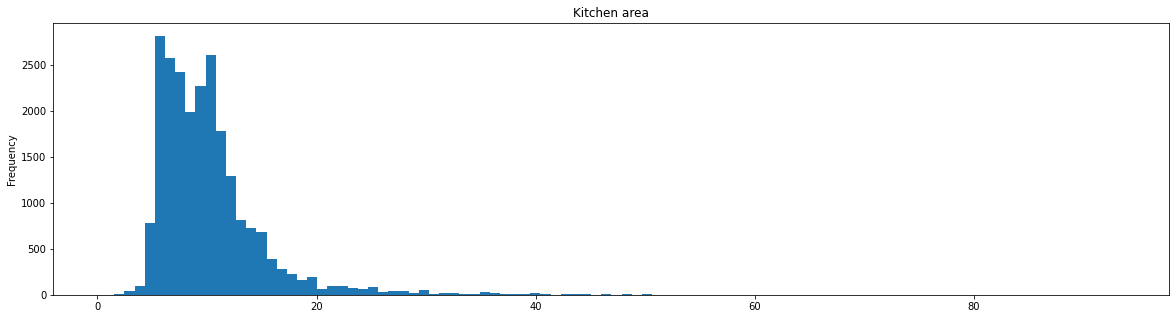

In [516]:
df['kitchen_area'].plot(kind = 'hist', title ='Kitchen area', bins=100, figsize=(20, 5))


<AxesSubplot:title={'center':'Kitchen area'}>

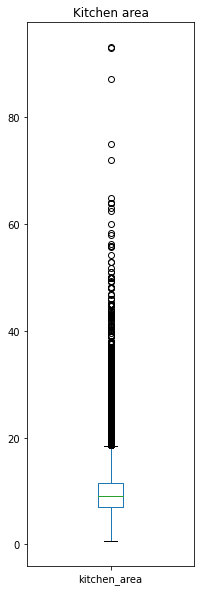

In [517]:
df['kitchen_area'].plot(kind='box', title ='Kitchen area', figsize=(3, 10))


In [518]:
df['kitchen_area'].quantile(.99)


30.9

In [519]:
print('Количество квартир с очень большой площадью кухни:', len(df[df['kitchen_area']>31]))


Количество квартир с очень большой площадью кухни: 221


In [520]:
df.query('kitchen_area>31 & kitchen_area == living_area')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_week,month,year,floor_type,city_center_km
3679,11,10300000.0,80.0,2017-07-22,3,2.75,18,32.0,5,True,...,NaN,0.0,NaN,3.0,128750.000000,5,7,2017,другой,15.0
10867,1,56844500.0,177.9,2015-01-15,3,3.00,6,87.2,5,True,...,160.0,3.0,569.0,NaN,319530.635188,3,1,2015,другой,0.0
21266,10,8800000.0,60.0,2018-07-23,2,3.15,6,35.0,4,True,...,531.0,2.0,518.0,NaN,146666.666667,0,7,2018,другой,8.0


Удалим из выборки квартиры с очень большой кухней, но не студии, апартаменты и открытую планировку


In [521]:
df.shape

(23078, 28)

In [522]:
df = df[(df['kitchen_area']<=31) | ((df['kitchen_area']>31) & (df['kitchen_area']==df['living_area']))]


In [523]:
df.shape

(22860, 28)

<AxesSubplot:title={'center':'Kitchen area'}, ylabel='Frequency'>

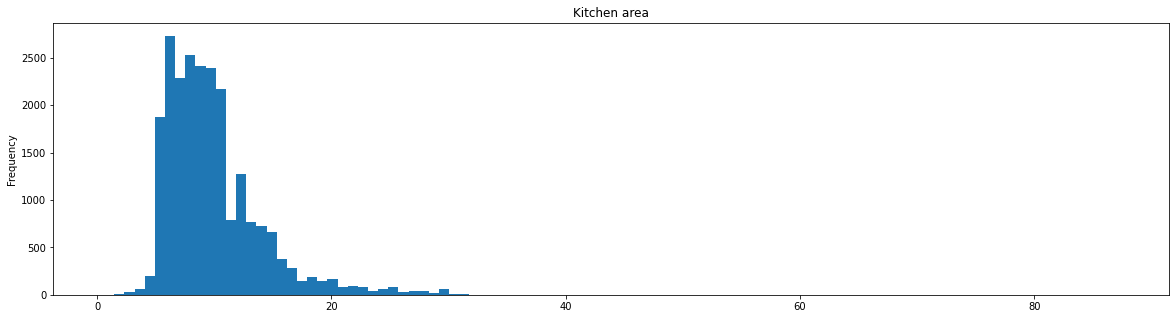

In [524]:
df['kitchen_area'].plot(kind = 'hist', title ='Kitchen area', bins=100, figsize=(20, 5))


In [525]:
df['kitchen_area'].describe()

count    22860.000000
mean         9.885024
std          4.137260
min          0.610000
25%          7.000000
50%          9.000000
75%         11.500000
max         87.200000
Name: kitchen_area, dtype: float64

Кухни в среднем 9 метров, также много кухонь по 5 метров, скорее всего это старые пятиэтажки.


<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Абсолютно верно рассмотрела параметры площадей квартиры, согласен с твоими выводами.

##### Цена объектов

In [526]:
df['last_price'].describe()


count    2.286000e+04
mean     5.672284e+06
std      4.970547e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      2.892384e+08
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Price'}, ylabel='Frequency'>

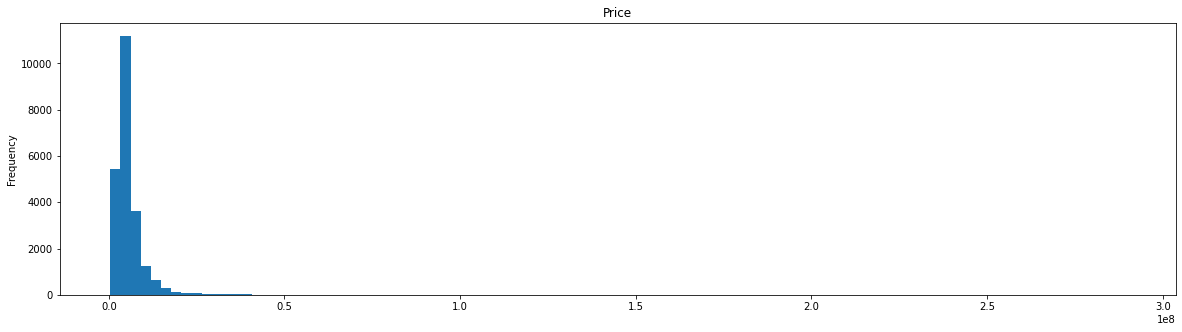

In [527]:
df['last_price'].plot(kind = 'hist', title ='Price', bins=100, figsize=(20, 5))


<AxesSubplot:title={'center':'Price'}>

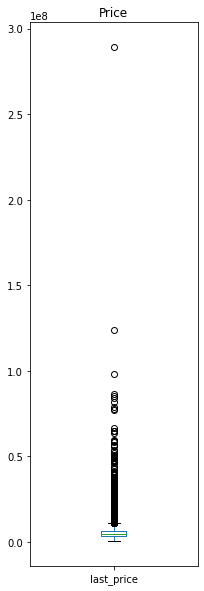

In [528]:
df['last_price'].plot(kind='box', title ='Price', figsize=(3, 10))


In [529]:
print(df['last_price'].quantile(.01))
print(df['last_price'].quantile(.99))


1000000.0
23414037.0


In [530]:
print('Количество квартир с очень высокой стоимостью:', len(df[df['last_price']>23414037]))
print('Количество квартир с очень низкой стоимостью:', len(df[df['last_price']<1000000]))


Количество квартир с очень высокой стоимостью: 229
Количество квартир с очень низкой стоимостью: 224


Минимальная стоимость квартиры начинается от 12 190 рублей, максимальная - 289 238 400. Подозрительно дешевые кварты есть. Медианная стоимость в районе 4,5 млн рублей. Воспользовавшись методом рассчета 1 и 99 квантиля удалим выбросы: 27 квартир с ценой более 25 млн рублей

In [531]:
df = df[(df['last_price']<=23414037) & (df['last_price']>=1000000)]
df['last_price'].describe()


count    2.240700e+04
mean     5.407654e+06
std      3.192027e+06
min      1.000000e+06
25%      3.400000e+06
50%      4.550000e+06
75%      6.450000e+06
max      2.341170e+07
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Price'}, ylabel='Frequency'>

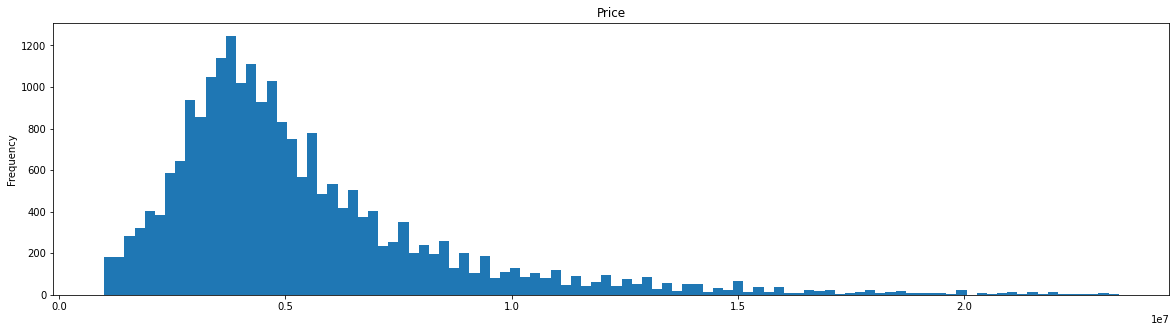

In [532]:
df['last_price'].plot(kind = 'hist', title ='Price', bins=100, figsize=(20, 5))


Большая часть продаваемых квартир стоит в районе 4,5 млн рублей

##### Количество комнат

In [533]:
df['rooms'].describe()


count    22407.000000
mean         1.987192
std          0.941172
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'Rooms'}, ylabel='Frequency'>

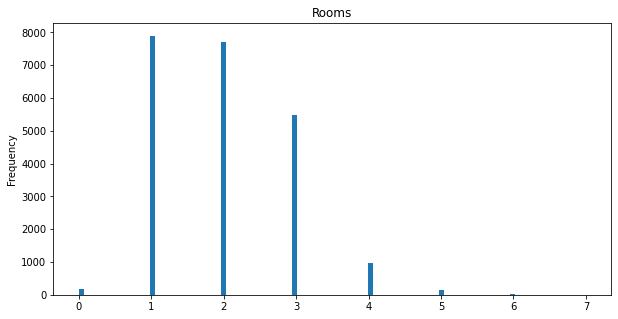

In [534]:
df['rooms'].plot(kind = 'hist', title ='Rooms', bins=100, figsize=(10, 5))


<AxesSubplot:title={'center':'Rooms'}>

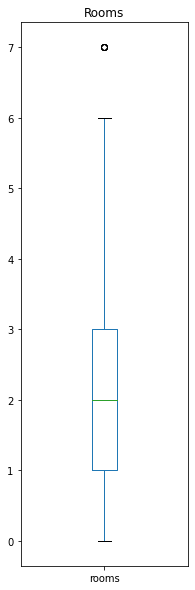

In [535]:
df['rooms'].plot(kind='box', title ='Rooms', figsize=(3, 10))


В основном на рынке присутствуют одно и двухкомнатные квартиры, после удаления предыдущих выбросов осталась 1 квартира с 7 комнатами. Квартиры без комнат - это студии, апартаменты и квартиры со свободной планировкой


##### Высота потолков

In [536]:
df['ceiling_height'].describe()


count    22407.000000
mean         2.723064
std          1.016378
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'Ceiling height'}, ylabel='Frequency'>

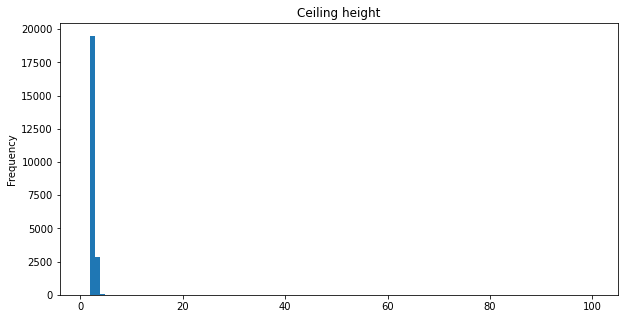

In [537]:
df['ceiling_height'].plot(kind = 'hist', title ='Ceiling height', bins=100, figsize=(10, 5))


In [538]:
df['ceiling_height'].quantile(.99)


3.5

In [539]:
print('Квартир с потолками от 3.5 до 25м:', df.query('ceiling_height > 3.5 and ceiling_height < 25')['ceiling_height'].count())
print('Квартир с потолками от 25м до 32м:', df.query('ceiling_height >= 25 and ceiling_height <= 32')['ceiling_height'].count())
print('Квартир с потолками до 2.5:', df.query('ceiling_height < 2.5')['ceiling_height'].count())
print('Квартир с потолками выше 32м:', df.query('ceiling_height > 32')['ceiling_height'].count())


Квартир с потолками от 3.5 до 25м: 186
Квартир с потолками от 25м до 32м: 19
Квартир с потолками до 2.5: 73
Квартир с потолками выше 32м: 1


В основном высота потолков в районе 2,7 метров, есть выбросы до 100 метров. Стандартная высота потолка 2,5 - 3,2 метра. Потолки с высотой от 25 до 32 метров - скорее всего от 2,5 до 3,2 метров(просто не указана точка), исправим их. Допустим, что максимальная высота потолка достигает 3,5 метров, все, что выше 3,5 - удалим как выбросы. Также есть потолки меньше 2,5 метров, что не соответствует стандартам жилой застройки, удалим их тоже.

In [540]:
df.update(df[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 32)]['ceiling_height']/10)

In [541]:
df.shape

(22407, 28)

In [542]:
df = df[(df['ceiling_height']<=3.5) & (df['ceiling_height']>=2.5)]
df.shape

(22147, 28)

<AxesSubplot:title={'center':'Ceiling height'}, ylabel='Frequency'>

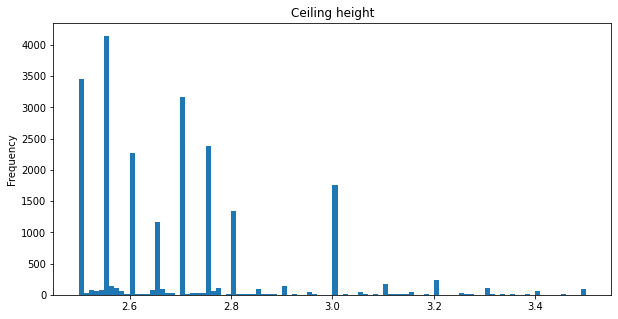

In [543]:
df['ceiling_height'].plot(kind = 'hist', title ='Ceiling height', bins=100, figsize=(10, 5))

In [544]:
df['ceiling_height'].describe()

count    22147.000000
mean         2.685427
std          0.183190
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          3.500000
Name: ceiling_height, dtype: float64

В основном, потолки 2,65 м.

##### Этаж, тип этажа квартиры и общее количество этажей в доме.

In [545]:
df['floor'].describe()

count    22147.000000
mean         5.954350
std          4.919532
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [546]:
df['floor_type'].value_counts()

другой       16395
последний     3009
первый        2743
Name: floor_type, dtype: int64

In [547]:
df['floors_total'].describe()

count    22147.000000
mean        10.898677
std          6.633953
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:title={'center':'Floor'}, ylabel='Frequency'>

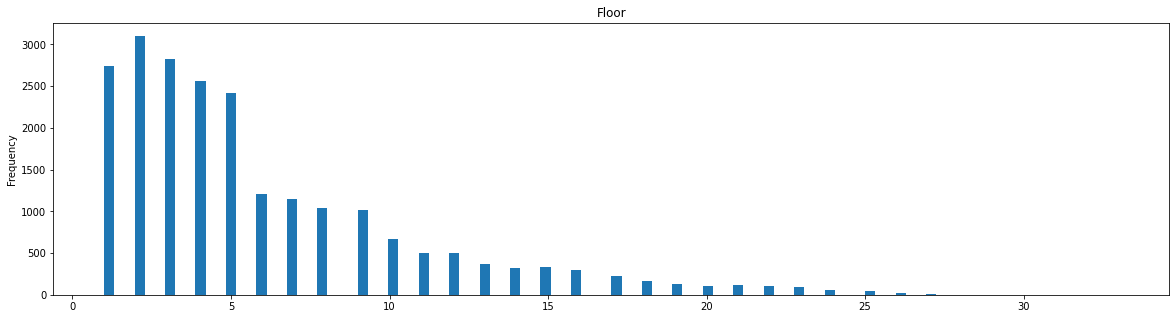

In [548]:
df['floor'].plot(kind = 'hist', title ='Floor', bins=100, figsize=(20, 5))

<AxesSubplot:>

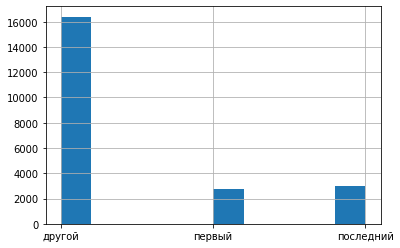

In [549]:
df['floor_type'].hist()

<AxesSubplot:title={'center':'Floor total'}, ylabel='Frequency'>

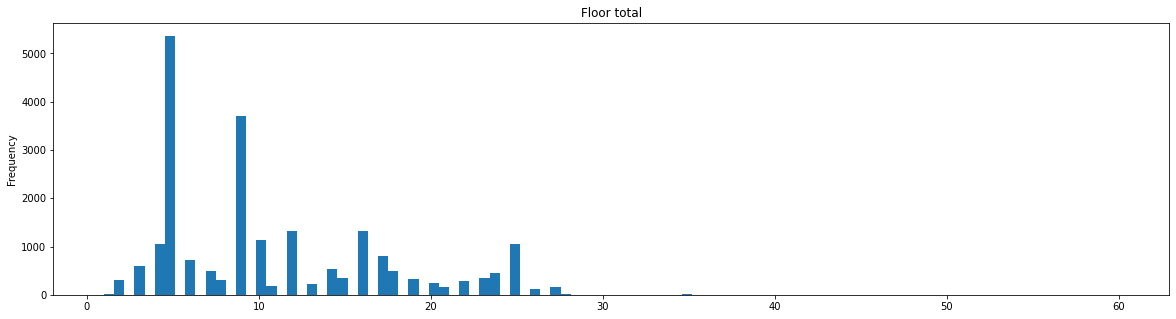

In [550]:
df['floors_total'].plot(kind = 'hist', title ='Floor total', bins=100, figsize=(20, 5))

Минимальный этаж продаваемых квартир - первый, максимальный - 33, больше всего продается квартир на 2 этаже, чаще всего продаются не первый и не последний этажи. Этажность домов от 1 до 60, больше всего квартир продается в пяти- и девятиэтажках.

##### Расстояния до центра города, ближайшего аэропорта и парка

In [551]:
df['city_сenters_nearest'].describe()

count    16945.000000
mean     14643.195987
std       8510.146737
min        287.000000
25%      10113.000000
50%      13354.000000
75%      16502.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

<AxesSubplot:title={'center':'Citi center'}, ylabel='Frequency'>

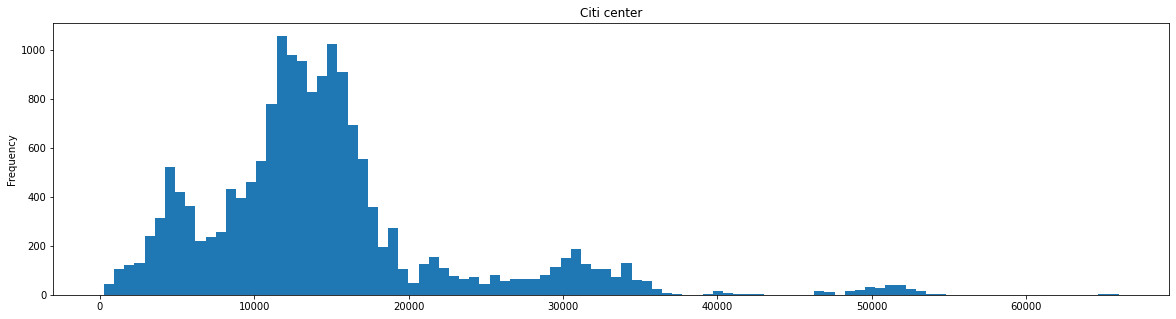

In [552]:
df['city_сenters_nearest'].plot(kind = 'hist', title ='Citi center', bins=100, figsize=(20, 5))

In [553]:
df['airports_nearest'].describe()

count    16927.000000
mean     28913.776570
std      12851.920518
min          0.000000
25%      18270.500000
50%      27107.000000
75%      37484.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:title={'center':'Airports'}, ylabel='Frequency'>

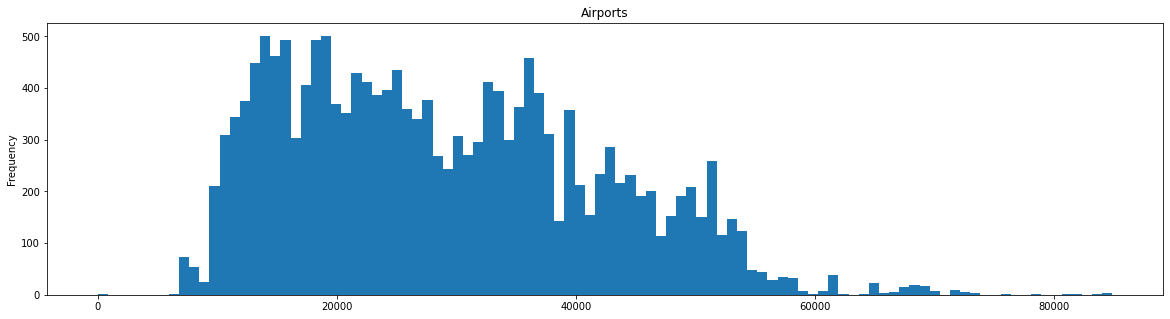

In [554]:
df['airports_nearest'].plot(kind = 'hist', title ='Airports', bins=100, figsize=(20, 5))

In [555]:
df.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_week,month,year,floor_type,city_center_km
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,True,...,NaN,0.0,NaN,60.0,201729.106628,6,9,2018,другой,23.0


In [556]:
df['parks_nearest'].describe()

count    7252.00000
mean      496.76241
std       345.08706
min         1.00000
25%       292.75000
50%       458.00000
75%       618.00000
max      3190.00000
Name: parks_nearest, dtype: float64

<AxesSubplot:title={'center':'Parks'}, ylabel='Frequency'>

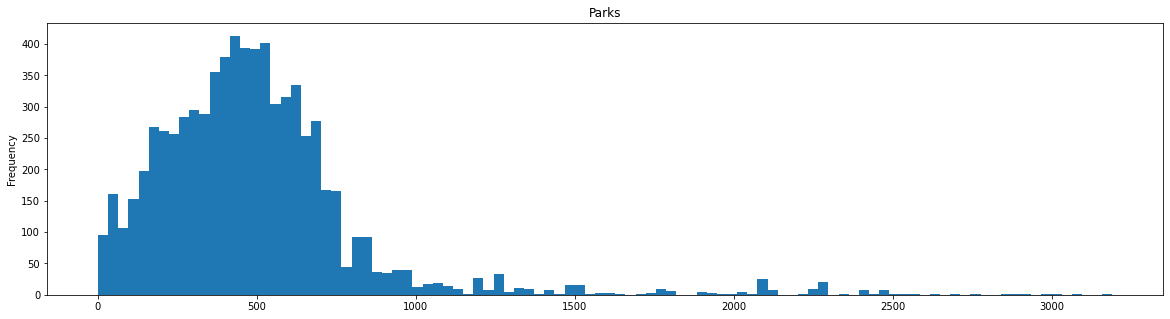

In [557]:
df['parks_nearest'].plot(kind = 'hist', title ='Parks', bins=100, figsize=(20, 5))

Чаще всего попадаются квартиры на расстоянии 13 км от центра города, 27 км от ближайшего аэропорта и на удалении полукилометра от парка. Есть 1 квартира в самом аэропорту, подойдет для пилотов.

##### День и месяц публикации объявления

In [558]:
df['day_week'].value_counts()

3    3981
1    3948
4    3755
2    3692
0    3376
5    1804
6    1591
Name: day_week, dtype: int64

<AxesSubplot:title={'center':'Day of the week'}, ylabel='Frequency'>

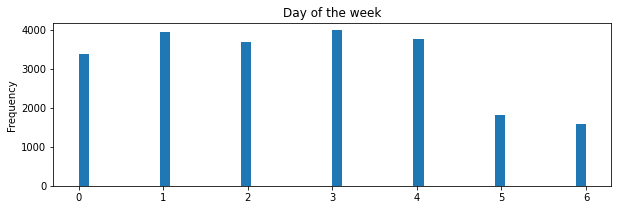

In [559]:
df['day_week'].plot(kind = 'hist', title ='Day of the week', bins=50, figsize=(10, 3))

In [560]:
df['month'].value_counts()

2     2470
3     2417
11    2221
4     2219
10    2002
9     1860
8     1646
6     1641
7     1569
12    1539
1     1387
5     1176
Name: month, dtype: int64

<AxesSubplot:title={'center':'Months'}, ylabel='Frequency'>

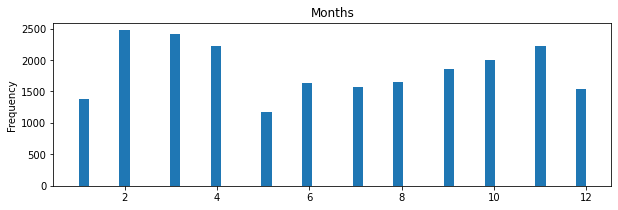

In [561]:
df['month'].plot(kind = 'hist', title ='Months', bins=50, figsize=(10, 3))

In [562]:
df['year'].value_counts()

2018    8050
2017    7681
2019    2694
2016    2560
2015    1048
2014     114
Name: year, dtype: int64

<AxesSubplot:title={'center':'Years'}, ylabel='Frequency'>

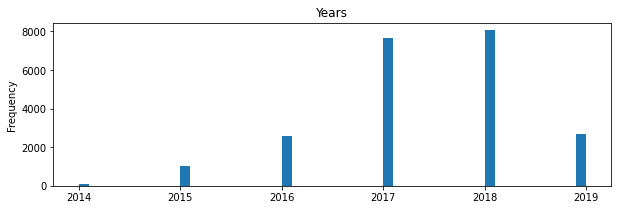

In [563]:
df['year'].plot(kind = 'hist', title ='Years', bins=50, figsize=(10, 3))

In [564]:
df.pivot_table(index=['year'], columns='month', values='day_week', aggfunc='count')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,100.0
2015,45.0,57.0,100.0,45.0,60.0,83.0,82.0,81.0,82.0,133.0,145.0,135.0
2016,110.0,236.0,316.0,390.0,398.0,424.0,132.0,86.0,114.0,114.0,125.0,115.0
2017,275.0,400.0,203.0,602.0,526.0,637.0,532.0,698.0,926.0,884.0,1154.0,844.0
2018,561.0,1256.0,974.0,284.0,137.0,497.0,823.0,781.0,738.0,871.0,783.0,345.0
2019,396.0,521.0,824.0,898.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Чаще всего квартиры продавались по четвергам, реже всего в выходные. 
Февраль - самый лучший месяц для продажи квартиры, в мае продается меньше всего квартир. 
Праздничные месяцы (декабрь, январь и май) - самые низкие продажи, в основном, продажи приходятся на конец зимы, начало весны и конец осени.
В аграрный период спрос на квартиры падает.
С 2017 года количество продаж квартир стремительно выросло, видимо сказался кризис 2014 года.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Остальные параметры проанализировала тоже правильно, так держать!

#### Скорость продажи квартиры

In [565]:
df['days_exposition'].describe()

count    19318.000000
mean       176.424940
std        215.350459
min          1.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'Number of days'}>

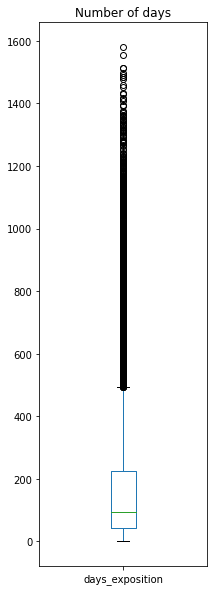

In [566]:
df['days_exposition'].plot(kind='box', title ='Number of days', figsize=(3, 10))

In [567]:
print(df['days_exposition'].quantile(0.9))

447.0


<AxesSubplot:title={'center':'Number of days'}, ylabel='Frequency'>

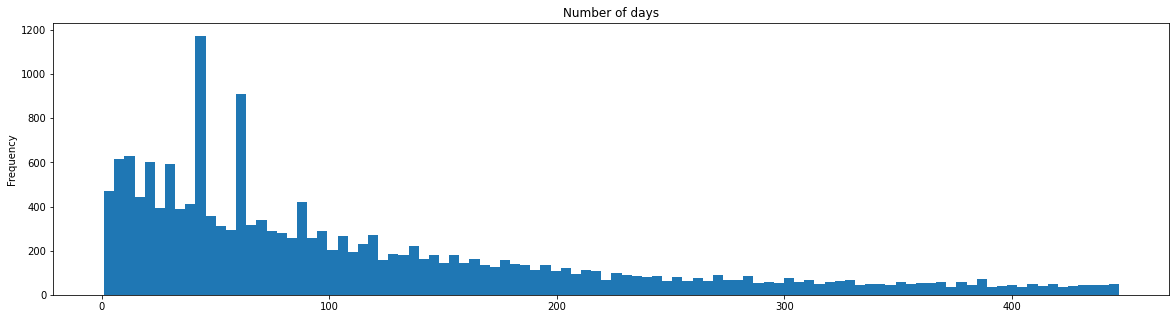

In [568]:
df['days_exposition'].plot(kind = 'hist', title ='Number of days', bins=100, figsize=(20, 5), range=(1, 447))

In [569]:
print('Количество квартир, проданных менее, чем за 44 дня:', len(df.query('1 <= days_exposition < 44')))
print('Количество квартир, проданных в промежутке от 44 до 224 дней:', len(df.query('44 <= days_exposition <= 224')))
print('Количество квартир, проданных в промежутке от 225 до 447 дней:', len(df.query('225 <= days_exposition <= 447')))
print('Количество квартир, проданных более, чем за 447 дней:', len(df.query('days_exposition > 447')))

Количество квартир, проданных менее, чем за 44 дня: 4762
Количество квартир, проданных в промежутке от 44 до 224 дней: 9739
Количество квартир, проданных в промежутке от 225 до 447 дней: 2889
Количество квартир, проданных более, чем за 447 дней: 1928


Продажа квартиры обычно занимает около 93 дней.
Самые быстрые продажи - до 44 дней
Необычно долгие - более 447 дней
В среднем квартиры продаются в промежутке от 44 до 224 дней.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Анализ проводишь правильно, только пропуски, которые ты заполнила нулями смещают статистики, например, действительное значение медианы отличается от 75 дней.

<div class="alert alert-info">
<h2>Комментарий студента V1<a class="tocSkip"> </h2>
<div>Исправлено</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> А сейчас все соответствует действительности.

#### Факторы, влияющие на общую (полную) стоимость объекта

In [570]:
def floor_type_num(f):
    if f['floor'] == 1:
        return '0'
    elif f['floor'] == f['floors_total']:
        return '1'
    else:
        return '2'
df['floor_type_number'] = df.apply(floor_type_num, axis=1)

In [571]:
df['floor_type_number'] = df['floor_type_number'].astype('int')

In [572]:
df['floor_type_number'].value_counts()

2    16395
1     3009
0     2743
Name: floor_type_number, dtype: int64

In [573]:
list = ['total_area',
        'living_area',
        'kitchen_area',
        'rooms',
        'floor_type_number', 
        'day_week',
        'month',
        'year']

for i in list:
    correlation = df['last_price'].corr(df[i])
    print('Корреляция между ценой и', i,  'составляет:', round(correlation, 2))

Корреляция между ценой и total_area составляет: 0.76
Корреляция между ценой и living_area составляет: 0.65
Корреляция между ценой и kitchen_area составляет: 0.58
Корреляция между ценой и rooms составляет: 0.47
Корреляция между ценой и floor_type_number составляет: 0.12
Корреляция между ценой и day_week составляет: -0.01
Корреляция между ценой и month составляет: 0.01
Корреляция между ценой и year составляет: -0.02


<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='last_price', ylabel='total_area'>

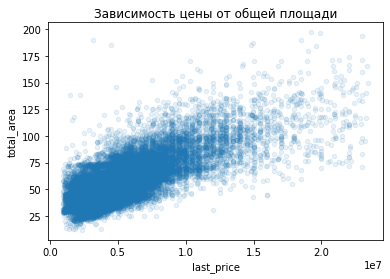

In [574]:
df.plot(x='last_price', y='total_area', kind='scatter', title='Зависимость цены от общей площади', alpha=0.1)

<AxesSubplot:title={'center':'Зависимость цены от жилой площади'}, xlabel='last_price', ylabel='living_area'>

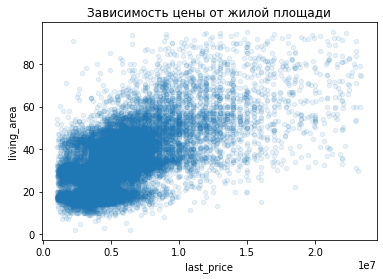

In [575]:
df.plot(x='last_price', y='living_area', kind='scatter', title='Зависимость цены от жилой площади', alpha=0.1)

<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='last_price', ylabel='kitchen_area'>

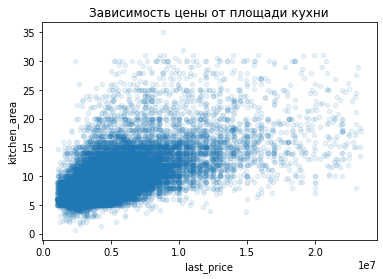

In [576]:
df.plot(x='last_price', y='kitchen_area', kind='scatter', title='Зависимость цены от площади кухни', alpha=0.1)

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

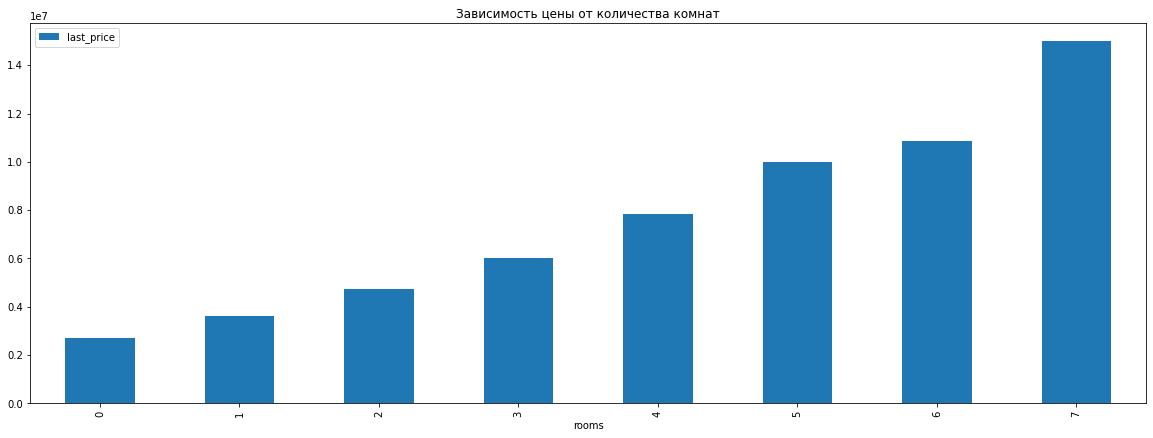

In [591]:
df.pivot_table(index='rooms',values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='Зависимость цены от количества комнат', figsize=(20, 7))

<AxesSubplot:title={'center':'Зависимость цены от типа этажа'}, xlabel='floor_type'>

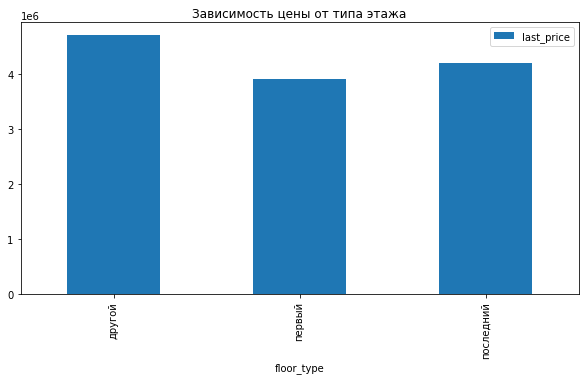

In [578]:
df.pivot_table(index='floor_type',values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='Зависимость цены от типа этажа', figsize=(10, 5))

<AxesSubplot:title={'center':'Зависимость цены от дня недели'}, xlabel='day_week'>

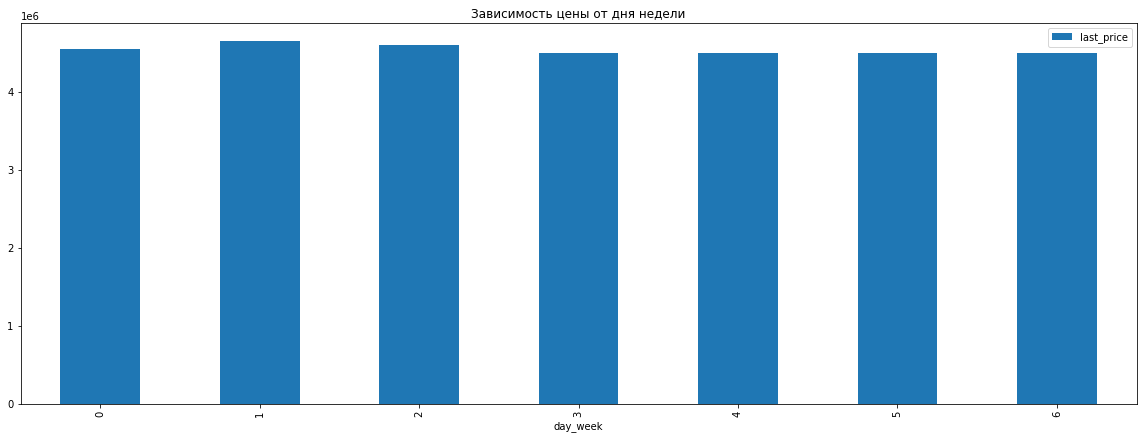

In [592]:
df.pivot_table(index='day_week', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='Зависимость цены от дня недели', figsize=(20, 7))

<AxesSubplot:title={'center':'Зависимость цены от месяца'}, xlabel='month'>

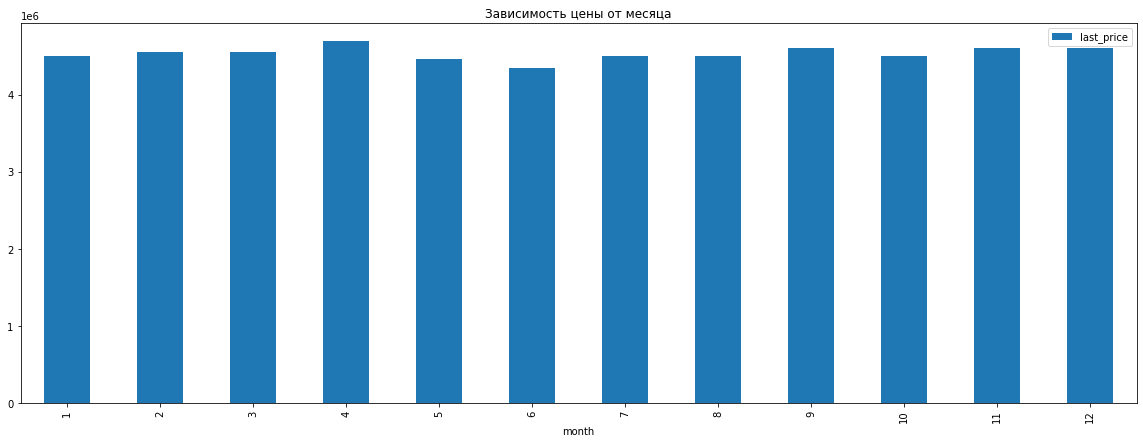

In [593]:
df.pivot_table(index='month', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='Зависимость цены от месяца', figsize=(20, 7))

<AxesSubplot:title={'center':'Зависимость цены от года'}, xlabel='year'>

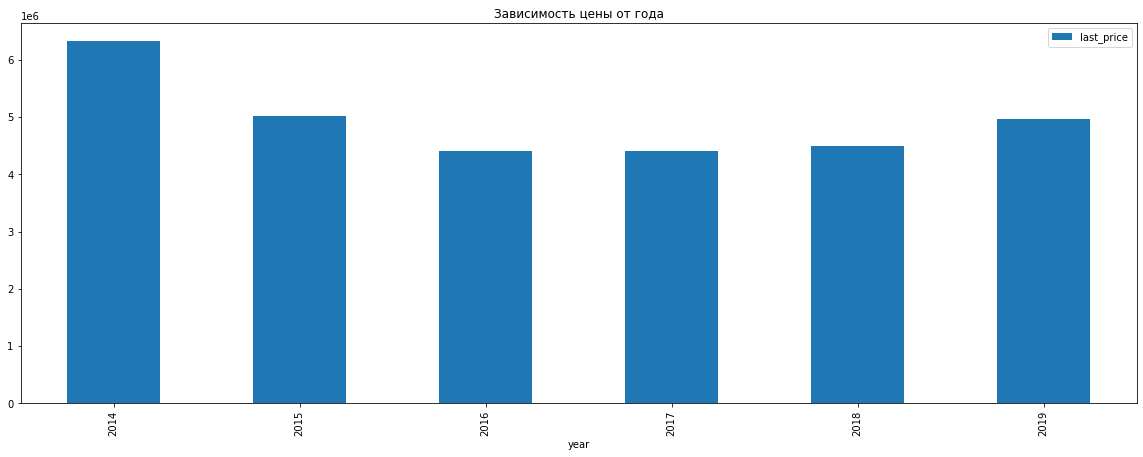

In [594]:
df.pivot_table(index='year', values='last_price', aggfunc='median').plot(y='last_price', kind='bar',title='Зависимость цены от года', figsize=(20, 7))

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
В данном случае лучше анализировать зависимость не с помощью круговых диаграмм, а, например, столбчатых. Тип диаграмм нужно изменить.

<div class="alert alert-info">
<h2>Комментарий студента V1<a class="tocSkip"> </h2>
<div>Исправлено</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отлично! Все правильно изменила, графики построила верно.

Цены на квартиры зависят в большей степени от(по убыванию):
    
    1. Общей площади
    2. Жилой площади
    3. Площади кухни
    4. Количества комнат
    
    
Прослеживается линейная зависимость цены квартиры от общей, жилой и площади кухни.
День и месяц продажи практически не влияют на цену недвижимости. В 2014 году квартиры продавались дороже, чем в 2018 году, после 2014 года заметен резкий спад стоимости жилья(видимо, связан с кризисом 2014 года), начиная с 2016 года цена постепенно начинает подниматься. Квартиры на первом этаже самые дешевые, затем идут квартиры на последнем этаже и самые дорогие квартиры расположились между первым и последним этажами, чем больше количество комнат, тем выше стоимость квартиры.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Нужно подробнее проанализировать зависимость, расписать какая она, что выделяется на графиках, вывод о её наличии или отсутствии нужно делать не только по значениям коэффициентов корреляций. Коэффициент корреляции Пирсона обладает рядом ограничений к использованию и он отражает только линейную зависимость, посмотри для каких случайных величин можно использовать данный коэффициент.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В выводах всегда старайся писать развернуто зависимости, которые тебе удалось найти. Все правильно по выводу доработала, так держать.

<div class="alert alert-info">
<h2>Комментарий студента V1<a class="tocSkip"></h2>
<div>Этот комментарий не совсем поняла, но дополнила немного вывод.</div>
<div>
<div class="course-navigation__title course-navigation__title_size_m course-navigation__header-title" role="heading" aria-level="1">&nbsp;</div>
<div class="course-navigation__title course-navigation__title_size_m course-navigation__header-title" role="heading" aria-level="1">"Статистический анализ данных: Изучение объектов и их взаимосвязей методами статистики. Выборки и статистическая значимость." - Это тема следующего спринта.</div>
<div class="course-navigation__title course-navigation__title_size_m course-navigation__header-title" role="heading" aria-level="1">&nbsp;</div>
</div>
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V2<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Я говорю именно про коэффициент корреляции между случайными величинами. Вы должны были его проходить к этому проекту, и его нужно использовать, чтобы посмотреть силу корреляции между признаками. То что ты написала, это другая тема, там будет рассмотрена новая теория.

<div class="alert alert-info">
<h2>Комментарий студента V2<a class="tocSkip"></h2>
<p>Цены на квартиры зависят в большей степени от(по убыванию):</p>
<ul>
<li>Общей площади (коэффициент корреляции Пирсона составил 0,76)</li>
<li>Жилой площади (коэффициент корреляции Пирсона составил 0,65)</li>
<li>Площади кухни (коэффициент корреляции Пирсона составил 0,58)</li>
<li>Количества комнат (коэффициент корреляции Пирсона составил 0,47)</li>
</ul>
<p>Прослеживается положительная линейная зависимость цены квартиры от общей и жилой площади, а также от площади кухни. Область высокой плотности сосредоточена на отметках для квартир стоимость до 10 млн. рублей, общей площадью до 90 кв.м, жилой площадью до 50 кв.м и площадью кухни до 15 кв.м.</p>
<p>День и месяц продажи практически не влияют на цену недвижимости. Однако, можно заметить незначительные отклонения: во вторник и среду квартиры продаются чуть дороже. С января цена начинает расти и достигает пика в апреле, затем идет спад с минимальным значением в июне, далее заметен небольшой рост, достигающий пика в сентябре, с октября наблюдается небольшое увеличение цены. Лучший месяц для продажи - в сентябре, худший - в июне.</p>
<p>В 2014 году квартиры продавались дороже, чем в 2018 году, после 2014 года заметен резкий спад стоимости жилья(видимо, связан с кризисом 2014 года), начиная с 2016 года цена постепенно начинает подниматься.</p>
<p>Квартиры на первом этаже самые дешевые, затем идут квартиры на последнем этаже и самые дорогие квартиры расположились между первым и последним этажами, чем больше количество комнат (и, соответственно площадь квартиры), тем выше стоимость квартиры.</p>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработала, молодец!

#### Цена за квадратный метр

In [582]:
ppm = df.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = 'median')
ppm = ppm.reset_index()
ppm



,locality_name,price_per_meter
0,бокситогорск,19600.140713
1,волосово,39906.323185
2,волхов,35143.769968
3,всеволожск,65789.473684
4,выборг,58407.079646
...,...,...
283,сосновый бор,74445.155783
284,сясьстрой,34782.608696
285,тихвин,40227.844322
286,тосно,57977.272727


In [583]:
top = df.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = 'count')
top = top.reset_index().rename(columns = {'price_per_meter':'count'})
top


,locality_name,count
0,бокситогорск,2
1,волосово,36
2,волхов,107
3,всеволожск,392
4,выборг,223
...,...,...
283,сосновый бор,86
284,сясьстрой,21
285,тихвин,48
286,тосно,102


Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [584]:
top_10 = top.merge(ppm, on='locality_name')
(top_10.sort_values(by='count', ascending=False).head(10)).round(2)


,locality_name,count,price_per_meter
269,санкт-петербург,14570,103636.36
185,поселок мурино,551,86042.64
258,поселок шушары,436,76876.17
3,всеволожск,392,65789.47
263,пушкин,348,99596.34
101,колпино,336,74723.75
196,поселок парголово,325,91917.59
6,гатчина,303,67924.53
38,деревня кудрово,298,91930.23
4,выборг,223,58407.08


Населённые пункты с самой высокой стоимостью квадратного метра

In [585]:
(top_10.sort_values(by='price_per_meter', ascending=False).head(10)).round(2)

,locality_name,count,price_per_meter
269,санкт-петербург,14570,103636.36
95,зеленогорск,23,103333.33
105,кудрово,169,100000.00
281,сестрорецк,177,99759.62
263,пушкин,348,99596.34
172,поселок левашово,1,96997.69
38,деревня кудрово,298,91930.23
196,поселок парголово,325,91917.59
110,мурино,34,91478.39
54,деревня мистолово,11,90888.89


Населённые пункты с самой низкой стоимостью квадратного метра

In [586]:
(top_10.sort_values(by='price_per_meter').head(10)).round(2)

,locality_name,count,price_per_meter
148,поселок житково,1,15648.29
282,сланцы,29,19230.77
188,поселок никольский,3,19298.25
0,бокситогорск,2,19600.14
175,поселок лесогорский,5,19833.33
193,поселок оредеж,1,19877.68
247,поселок торковичи,3,20458.89
116,пикалёво,7,20905.92
34,деревня кисельня,1,20909.09
204,поселок плоское,1,20912.55


<div class="alert alert-info">
<h2> Комментарий студента V1<a class="tocSkip"></h2>
<div >Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:</div>
<div >
<table width="328">
<tbody>
<tr>
<td width="132">locality_name</td>
<td width="84">count</td>
<td width="112">price_per_meter</td>
</tr>
<tr>
<td>санкт-петербург</td>
<td>14570</td>
<td>103636.36</td>
</tr>
<tr>
<td>поселок мурино</td>
<td>551</td>
<td>86042.64</td>
</tr>
<tr>
<td>поселок шушары</td>
<td>436</td>
<td>76876.17</td>
</tr>
<tr>
<td>всеволожск</td>
<td>392</td>
<td>65789.47</td>
</tr>
<tr>
<td>пушкин</td>
<td>348</td>
<td>99596.34</td>
</tr>
<tr>
<td>колпино</td>
<td>336</td>
<td>74723.75</td>
</tr>
<tr>
<td>поселок парголово</td>
<td>325</td>
<td>91917.59</td>
</tr>
<tr>
<td>гатчина</td>
<td>303</td>
<td>67924.53</td>
</tr>
<tr>
<td>деревня кудрово</td>
<td>298</td>
<td>91930.23</td>
</tr>
<tr>
<td>выборг</td>
<td>223</td>
<td>58407.08</td>
</tr>
</tbody>
</table>
Населённый пункт с самой высокой стоимостью квадратного метра:</div>
<div>Санкт - Петербург = 103636.36 рублей за кв.м</div>
<div>Населённый пункт с самой низкой стоимостью квадратного метра:</div>
<div>поселок Житково = 15648.29 рублей за кв.м</div>
<div>&nbsp;</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Молодец, что рассмотрела разные варианты, однако нужно в выводе всегда писать ответ на поставленный вопрос прежде всего, а затем по усмотрению выделять другие найденные особенности.

<div class="alert alert-info">
<h2>Комментарий студента V1<a class="tocSkip"> </h2>
<div>Исправлено</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Полностью согласен с твоим выводом, молодец!

#### Средняя цена каждого километра до центра города в Санкт-Петербурге

In [595]:
km_mean = df[df['locality_name']=='санкт-петербург']
km = km_mean.pivot_table(index='city_center_km', values='price_per_meter', aggfunc='mean')
(km).round(2)

,price_per_meter
city_center_km,
0.0,110557.90
1.0,129599.12
2.0,125868.15
3.0,114355.94
4.0,123122.36
5.0,128766.12
6.0,128577.85
7.0,126404.85
8.0,122003.86


<AxesSubplot:title={'center':'Средняя цена каждого километра до центра города'}, xlabel='city_center_km'>

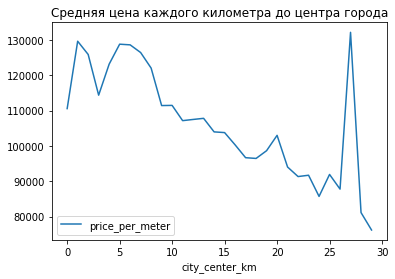

In [588]:
km.plot(title = 'Средняя цена каждого километра до центра города')

In [596]:
km_mean.query('city_center_km==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_week,month,year,floor_type,city_center_km,floor_type_number
1934,18,9590000.0,108.0,2017-05-23,2,3.30,5,59.00,2,False,...,3.0,290.0,69.0,88796.296296,1,5,2017,другой,0.0,2
2609,20,7200000.0,80.0,2017-08-24,3,2.80,4,43.00,1,True,...,2.0,516.0,11.0,90000.000000,3,8,2017,первый,0.0,0
2988,2,5300000.0,49.0,2016-11-09,3,2.80,3,30.00,3,True,...,3.0,305.0,232.0,108163.265306,2,11,2016,последний,0.0,1
3800,12,6900000.0,47.6,2015-07-22,2,2.55,5,28.20,5,True,...,3.0,142.0,398.0,144957.983193,2,7,2015,последний,0.0,1
8239,10,13500000.0,96.9,2018-08-06,3,3.20,7,67.30,3,True,...,2.0,657.0,14.0,139318.885449,0,8,2018,другой,0.0,2
8677,15,13500000.0,98.0,2017-12-19,3,3.50,5,46.00,3,True,...,3.0,222.0,35.0,137755.102041,1,12,2017,другой,0.0,2
9488,3,8000000.0,106.0,2018-07-26,3,3.40,4,60.23,1,True,...,2.0,38.0,60.0,75471.698113,3,7,2018,первый,0.0,0
22036,3,7200000.0,72.0,2017-12-21,2,3.07,3,44.90,2,True,...,3.0,273.0,89.0,100000.000000,3,12,2017,другой,0.0,2


In [590]:
km_mean.query('city_center_km==27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_week,month,year,floor_type,city_center_km,floor_type_number
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,True,...,0.0,NaN,128.0,193918.918919,1,11,2017,другой,27.0,2
5961,6,2250000.0,32.0,2018-02-27,1,2.70,2,16.5,2,True,...,0.0,NaN,178.0,70312.500000,1,2,2018,последний,27.0,1


Наиболее высокая стоимость объектов находится в центре города и ограничивается 8 км от центра. По непонятной мне причине жилье в самом центре города стоит столько же, сколько и на расстоянии 12 км от оного (фейковые объявления?). Чем больше расстояние от центра города, тем дешевле недвижимость, однако, есть выброс в районе 27 км от города с элитной недвижимостью.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Все правильно написал, только нужно выделить общую тенденцию, которая прослеживается между стоимость квадратного метра и отдалением от центра города.

<div class="alert alert-info">
<h2>Комментарий студента V1<a class="tocSkip"> </h2>
<div>Исправлено</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно изменила.

### Общий вывод

<p>Объект исследования - данные сервиса Яндекс.Недвижимость &mdash; архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за период с конца 2014 по начало 2019 годов. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические.</p>
<p>В процессе предобработки данных были выявлены и обработаны по словарю неявные дубликаты в столбце `locality_name `,&nbsp; устранены пропуски в данных, появившиеся в следствии некорректного заполнения анкеты и багов в работе сервиса. Пропуски были заменены с учетом медианных значений соседних столбцов, либо оставлены без изменений в тех случаях, где установить истинность не представлялось возможным.</p>
<p>Для дальнейшего исследования были добавлены столбцы со значениями:</p>
<ul>
<li>цена одного квадратного метра;</li>
<li>день недели публикации объявления;</li>
<li>месяц публикации объявления;</li>
<li>год публикации объявления;</li>
<li>тип этажа квартиры (значения &mdash; &laquo;&lrm;первый&raquo;, &laquo;последний&raquo;, &laquo;другой&raquo;);</li>
<li>расстояние до центра города в километрах.</li>
</ul>
<p>Проведенное исследование показало, что на рынке преобладают квартиры среднего ценового сегмента:</p>
<ul>
<li>одно- и двухкомнатные квартиры</li>
<li>в пяти- и девятиэтажках</li>
<li>расположенные не на первом и не на последнем этажах</li>
<li>с площадью 30 и 45 кв.м</li>
<li>со средней стоимостью в районе 4,5 млн. рублей</li>
</ul>
<p>Цены на квартиры зависят в большей степени от общей и жилой площади, площади кухни и количества комнат.</p>
<p>Заметен явный тренд к увеличению цены после 2016 года.</p>
<p>Самые дорогие квартиры находятся в радиусе 8 км от центра города. Также, были выявлены дешевые квартиры, находящиеся в самом центре города, возможно - это фейковые объявления.</p>
<p>Максимальная цена жилья в Санкт-Петербурге, минимальная в поселке Житково.</p>
<p>&nbsp;</p>

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный вывод, все четко, понятно и структурировано. Вывод в полной мере отражает существующие зависимости, и по нему можно принимать дальнейшие решения.
</div>

<div class="alert alert-info">
<h2>Комментарий студента V1<a class="tocSkip"> </h2>
<div>Спасибо за проверку и указание ошибок, постаралась все поправить в соответствии с твоими рекомендациями.</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! Я уверен, что ты приложила все усилия, чтобы сделать этот проект. Это видно по твоей работе, а сформулированные выводы отражают, насколько успешно ты осваиваешь материал.

**Отмечу отдельные положительные моменты проекта🙂**:

* Ты полностью следовала всем этапам выполнения задания и справилась почти со всем. Хорошая работа!
* Отдельно выделю некоторые выводы, которые ты смогла сформулировать абсолютно точно!
* У тебя опрятный и читаемый код. Возможно это звучит банально, однако при работе с чужим кодом это крайне важно)


**На что стоит обратить внимание🤓**:

* Нужно корректно обработать все признаки.
* Подробнее опиши зависимость стоимости квартиры от различных параметров квартир.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**


**На что стоит обратить внимание🤓**:

* Осталось только рассчитать корреляцию между признаками и проанализировать полученные значения.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid Chocolate 2px; padding: 40px">

Ты отлично справилась с данной работой! Видно, как ты успешно осваиваешь материал, применяешь полученные знания на практике. Мне было очень приятно проверять твою работу, надеюсь, мои комментарии и советы были для тебя полезными.

**Желаю удачи в последующем обучении и исследованиях!**😉